## 1. The load of packages, modules, and data

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../')
from tropical_rainfall_class import TR_PR_Diagnostic as TR_PR_Diag

FDB5 binary library not present on system, disabling FDB support.


#### ICON data

In [2]:
reader = Reader(model="ICON", exp="ngc2009", source="atm_2d_ml_R02B09",  regrid="r100")
icon = reader.retrieve(regrid=True,  streaming=True, stream_step=3, stream_unit='days') 

In [3]:
diag = TR_PR_Diag(num_of_bins = 20, first_edge = 220, width_of_bin = 100/20)

In [4]:
hist_2t_global = diag.histogram(icon, variable_1='2t', trop_lat=90)
hist_2t_global

<xarray.Dataset>
Dimensions:        (center_of_bin: 20)
Coordinates:
  * center_of_bin  (center_of_bin) float64 222.5 227.5 232.5 ... 312.5 317.5
    width          (center_of_bin) float64 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0
Data variables:
    counts         (center_of_bin) float64 11.0 6.198e+03 ... 6.819e+03 256.0
    frequency      (center_of_bin) float64 1.187e-06 0.0006689 ... 2.763e-05
    pdf            (center_of_bin) float64 2.374e-07 0.0001338 ... 5.525e-06
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    comment:              Sapphire Dyamond (k203123) on l40687 (Linux 4.18.0-...
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/mp...
    history:              ./icon at 20220512 1522142023-06-19 22:26:35 regrid...
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    number_of_grid_used:  15
    references:           see MPIM/DWD publications
    source:               git@gitlab.dkrz.de:icon/icon-aes.git@87a1eaded69e87...
    title:                ICON simulation
    uuidOfHGrid:          0f1e7d66-637e-11e8-913b-51232bb4d8f9

In [5]:
hist_2t_trop = diag.histogram(icon, variable_1='2t')
hist_2t_trop

<xarray.Dataset>
Dimensions:        (center_of_bin: 20)
Coordinates:
  * center_of_bin  (center_of_bin) float64 222.5 227.5 232.5 ... 312.5 317.5
    width          (center_of_bin) float64 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0
Data variables:
    counts         (center_of_bin) float64 0.0 0.0 0.0 ... 4.896e+03 210.0 0.0
    frequency      (center_of_bin) float64 0.0 0.0 0.0 ... 0.004755 0.000204 0.0
    pdf            (center_of_bin) float64 0.0 0.0 0.0 ... 4.079e-05 0.0
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    comment:              Sapphire Dyamond (k203123) on l40687 (Linux 4.18.0-...
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/mp...
    history:              ./icon at 20220512 1522142023-06-19 22:26:35 regrid...
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    number_of_grid_used:  15
    references:           see MPIM/DWD publications
    source:               git@gitlab.dkrz.de:icon/icon-aes.git@87a1eaded69e87...
    title:                ICON simulation
    uuidOfHGrid:          0f1e7d66-637e-11e8-913b-51232bb4d8f9

{<Axes: title={'center': '2 metre temperature'}, xlabel='Precipitation, K', ylabel='Counts'>,
 <Figure size 720x450 with 1 Axes>}

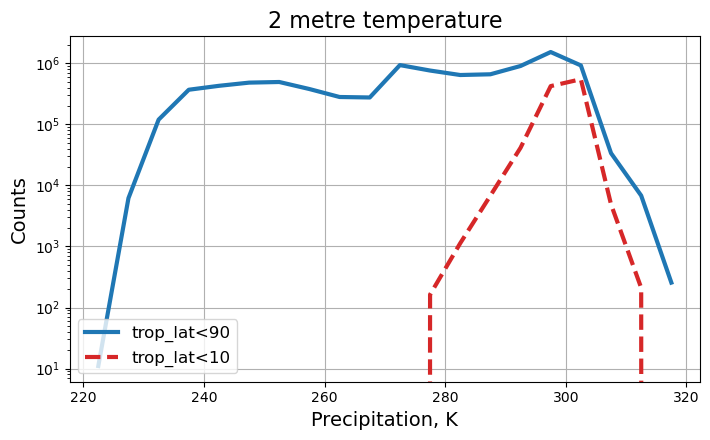

In [7]:
add= diag.hist_figure(hist_2t_global, frequency=False, pdf=False, legend='trop_lat<90', figsize=0.9)
diag.hist_figure(hist_2t_trop, frequency=False, pdf=False, add=add, color='tab:red', legend='trop_lat<10', ls='--',
                 loc='lower left',
                 plot_title='2 metre temperature')